In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.preprocessing import StandardScaler
from featurewiz import featurewiz
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

Imported version = 0.1.50.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


# Data Collection


In [2]:
df=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.shape

(253680, 22)

In [5]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
92783,0.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
19519,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,5.0
239829,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,5.0,0.0,0.0,0.0,8.0,5.0,8.0
179386,0.0,1.0,0.0,1.0,33.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,3.0,10.0,5.0,1.0,0.0,10.0,3.0,7.0
152289,0.0,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0


In [6]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.rename(columns={'Diabetes_binary': 'Diabetes_yes_no'}, inplace=True)
df.head()

,Diabetes_yes_no,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
Diabetes=df['Diabetes_yes_no']
Diabetes.value_counts()


0.0    218334
1.0     35346
Name: Diabetes_yes_no, dtype: int64

In [9]:
df.Diabetes_yes_no.unique()

array([0., 1.])

In [10]:
Diabetes=df['Diabetes_yes_no']
Diabetes.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_yes_no, dtype: int64

In [11]:
df.Diabetes_yes_no.unique()

array([0., 1.])

In [12]:
df.HighBP.unique()

array([1., 0.])

In [13]:
df.HighChol.unique()

array([1., 0.])

In [14]:
df.HeartDiseaseorAttack.unique()

array([0., 1.])

In [15]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

In [16]:
df.DiffWalk.unique()

array([1., 0.])

In [17]:
df.Sex.unique()

array([0., 1.])

In [18]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [19]:
df.Education.unique()

array([4., 6., 3., 5., 2., 1.])

In [20]:
df.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

# Data Cleaning

In [21]:
df.isna().sum()

Diabetes_yes_no         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Visualize correlation

In [22]:
df.corr()

,Diabetes_yes_no,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_yes_no,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<function matplotlib.pyplot.show(close=None, block=None)>

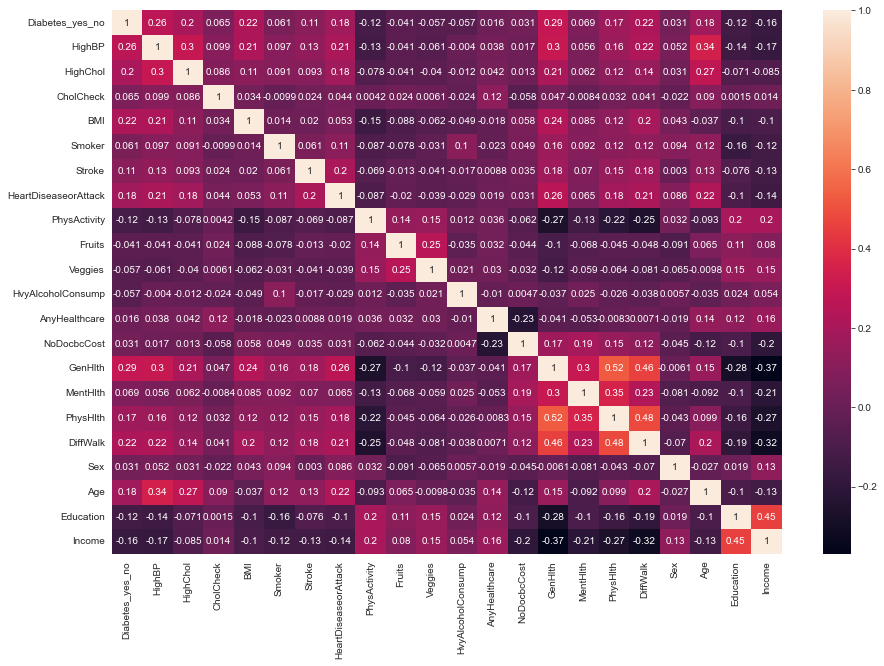

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show

In [24]:
df.head()

,Diabetes_yes_no,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_yes_no       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [26]:
df.shape

(253680, 22)

In [27]:
data_input = df.drop(columns=['Diabetes_yes_no'])
data_output =  df['Diabetes_yes_no']
data_input.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Splitting Data

In [28]:
x,x_test,y,y_test=train_test_split(data_input,data_output,test_size=0.2,random_state=2)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.33,random_state=2)

In [29]:
print(x_val.shape)
print(y_val.shape)

(66972, 21)
(66972,)


# Algorithms

# 1: Decision Tree

In [30]:
model = DecisionTreeClassifier(max_depth=50)

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50)

In [32]:
y_pred_train=model.predict(x_train)
y_pred_val=model.predict(x_val)

In [33]:
print(accuracy_score(y_train,y_pred_train))

0.9956388079898802


In [34]:
print(accuracy_score(y_val,y_pred_val))

0.7938541480021502


In [35]:
max_depth_values=[1,2,3,4,5,6,7,8,9,10,11]
train_accuracy_values=[]
val_accuracy_values=[]

for max_depth_val in max_depth_values:
    model=DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val=model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)    

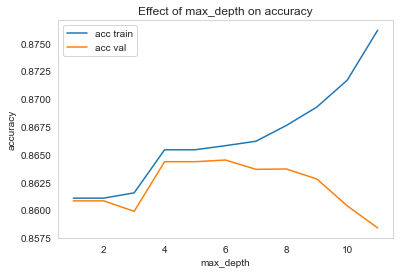

In [36]:
plt.plot(max_depth_values,train_accuracy_values,label='acc train')
plt.plot(max_depth_values,val_accuracy_values,label='acc val')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()

In [37]:
model_best = DecisionTreeClassifier(max_depth=6,random_state=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=2)

In [38]:
y_pred_test_dt = model_best.predict(x_test)
print(accuracy_score(y_test,y_pred_test_dt))

0.8633908861557869


In [39]:
with open('saved.model.pickle','wb')as f:
    pickle.dump(model_best,f)

In [40]:
with open('saved.model.pickle','rb')as f:
    loaded_model = pickle.load(f)

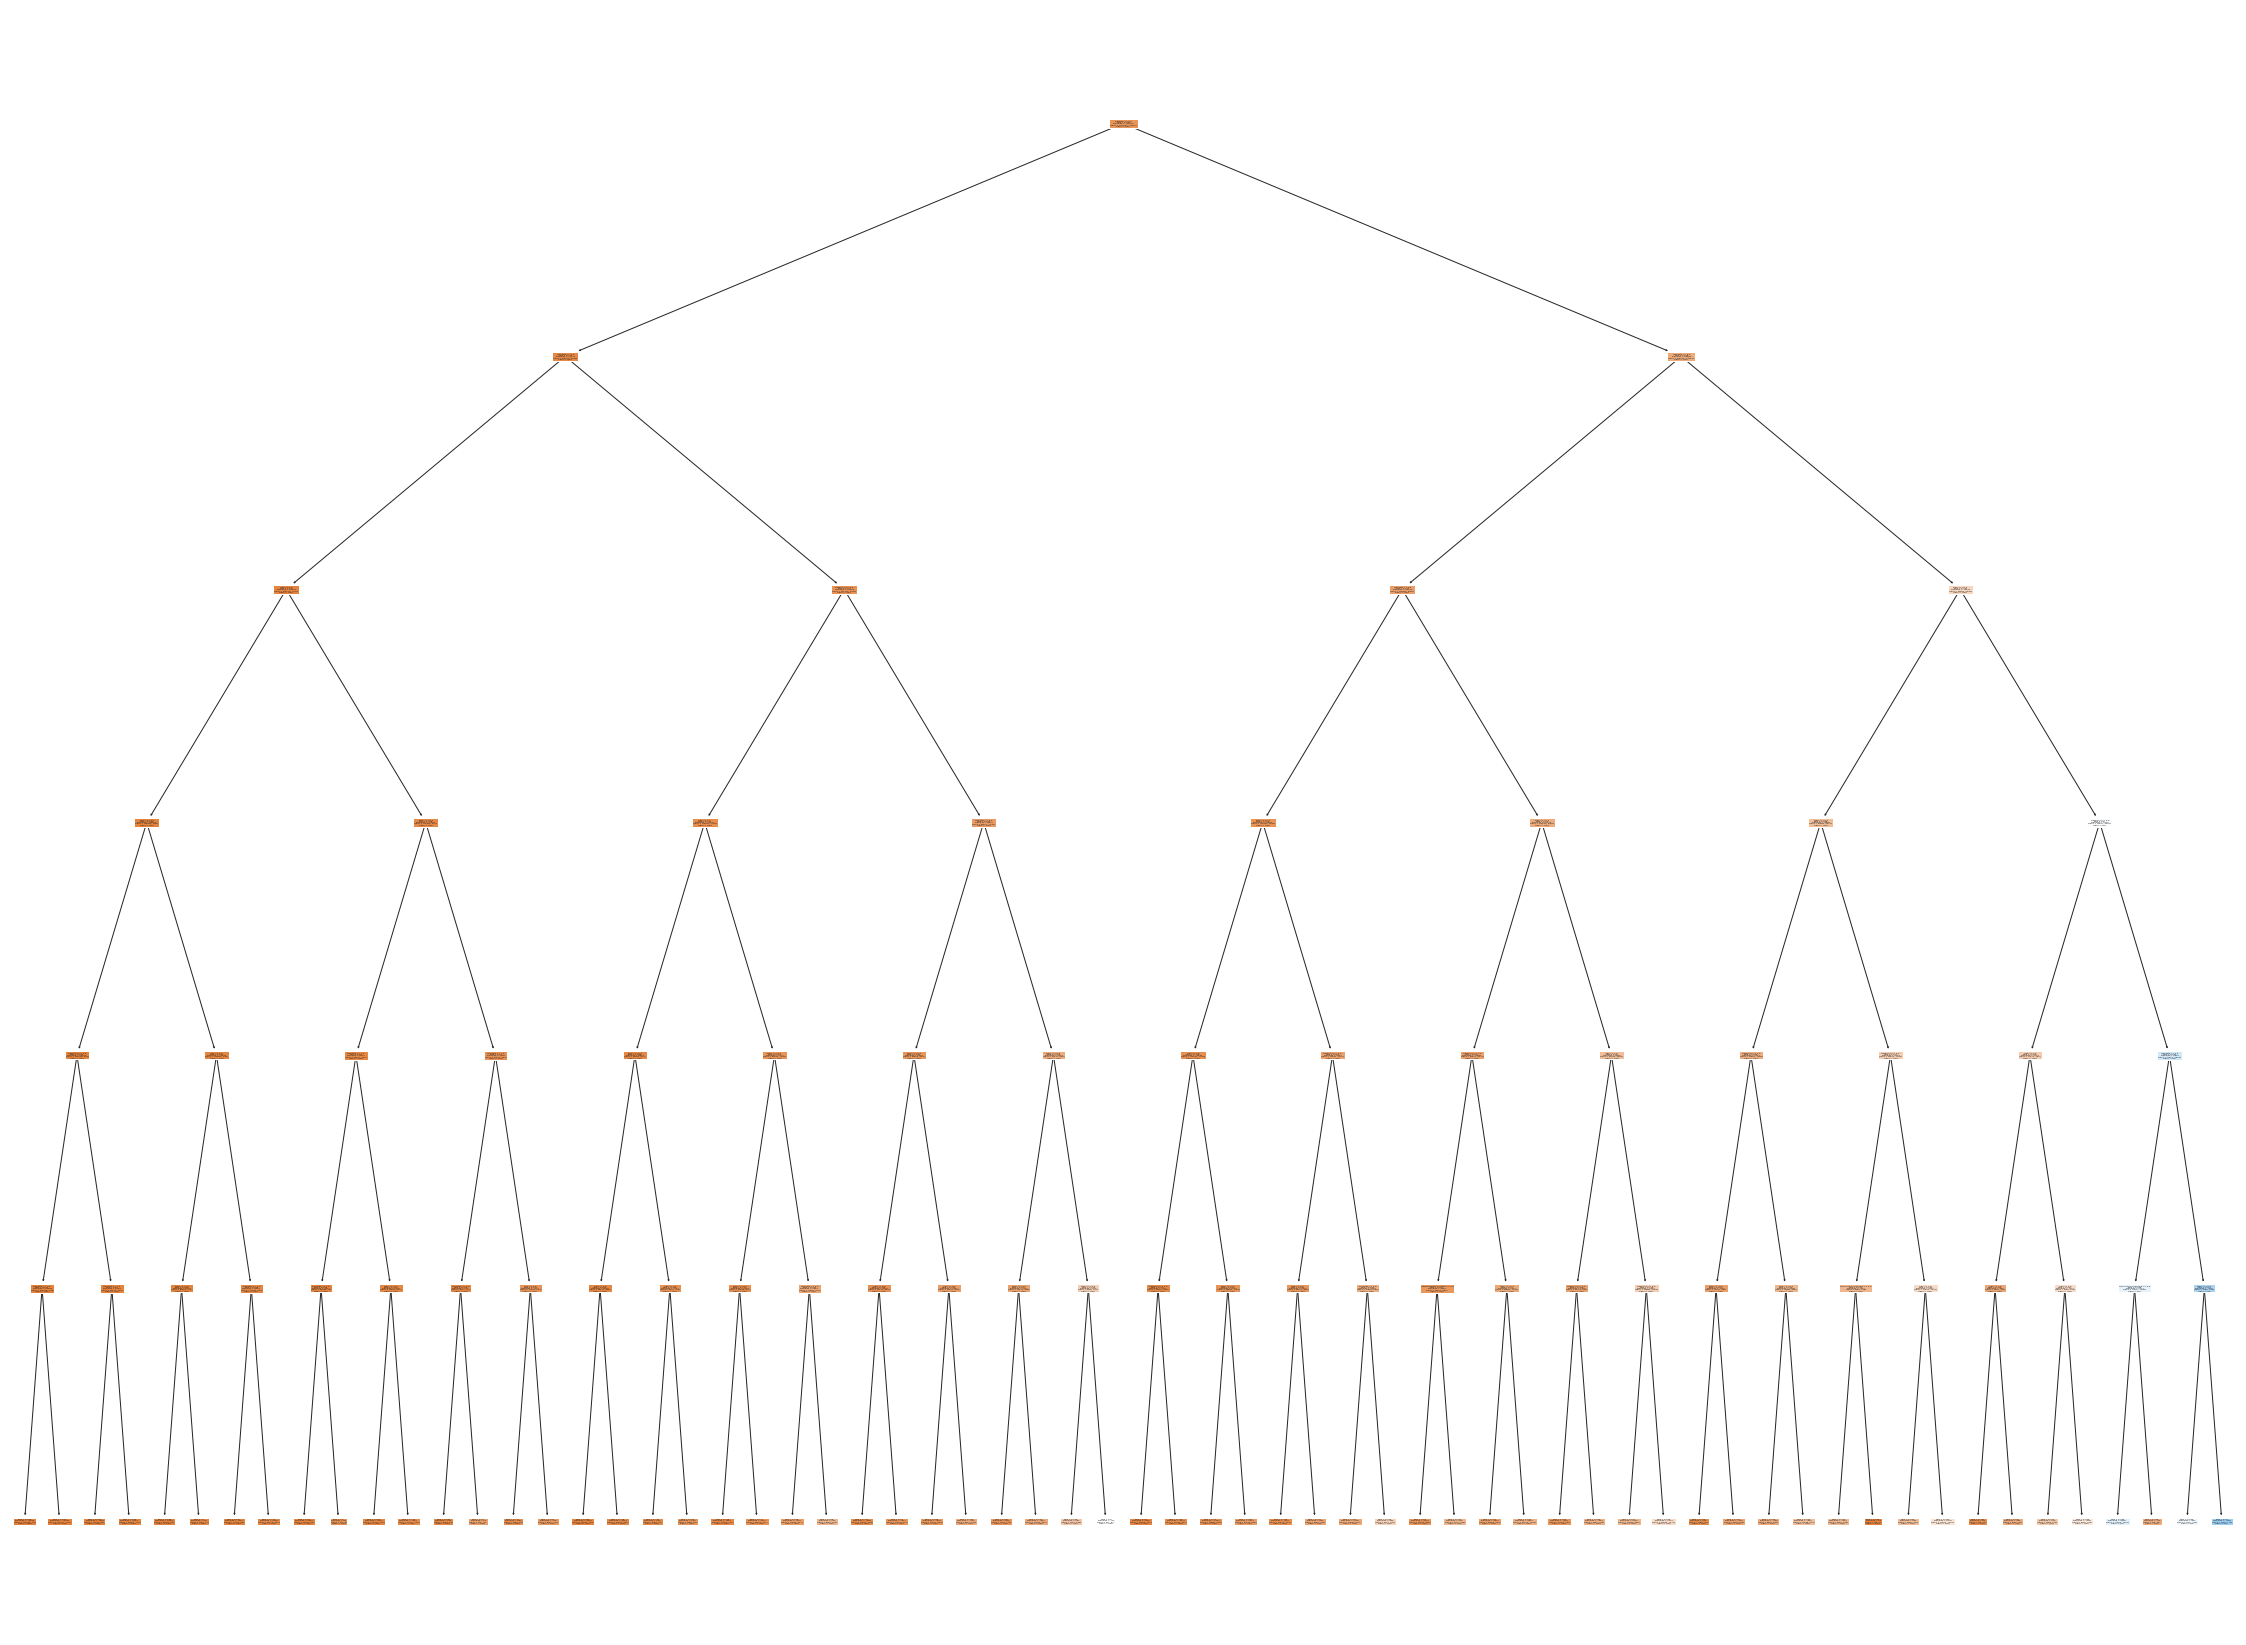

In [41]:


plt.figure(figsize=(40, 30))

tree.plot_tree(model_best,
               feature_names=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                              'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                              'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
                              ],
               class_names=['YES', 'NO'],
               filled=True
               )
plt.show()

before sampling

In [42]:
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.93     43602
         1.0       0.56      0.13      0.21      7134

    accuracy                           0.86     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.86      0.82     50736



model test before sampling 

In [43]:
print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred_test_dt))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred_test_dt)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred_test_dt)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred_test_dt)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")

confussion matrix is : 

[[42881   721]
 [ 6210   924]]
-----------------------
Accuracy is : 
 86.33908861557869
-----------------------
F1 score is : 
 21.0502335117895
-----------------------
Precsion is : 
 56.17021276595745
-----------------------


model training before sampling

In [44]:
y_pred_dt = model_best.predict(x)
print ("confussion matrix is : \n")
print (confusion_matrix(y, y_pred_dt))
print ("-----------------------")
ACC = accuracy_score(y, y_pred_dt)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y, y_pred_dt)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y, y_pred_dt)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[171882   2850]
 [ 24474   3738]]
-----------------------
Accuracy is : 
 86.53618732261117
-----------------------
Precsion is : 
 56.73952641165756
-----------------------
F1 score is : 
 21.482758620689655
-----------------------


In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(data_output == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(data_output == 0)))

Before OverSampling, counts of label '1': 35346
Before OverSampling, counts of label '0': 218334 



sampling data with smote

In [46]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(data_input, data_output)

In [47]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_res,y_res,test_size=0.3,random_state=2)

In [48]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, counts of label '1': 218334
After OverSampling, counts of label '0': 218334


In [49]:
model_best.fit(x_train_s,y_train_s)

DecisionTreeClassifier(max_depth=6, random_state=2)

model test after sampling 

In [50]:
y_pred_test = model_best.predict(x_test_s)
print(classification_report(y_test_s,y_pred_test))
print(accuracy_score(y_test_s,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     65606
         1.0       0.81      0.82      0.82     65395

    accuracy                           0.81    131001
   macro avg       0.81      0.81      0.81    131001
weighted avg       0.81      0.81      0.81    131001

0.8132838680620759


In [51]:
print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred_test))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred_test)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred_test)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred_test)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[52636 12970]
 [11490 53905]]
-----------------------
Accuracy is : 
 81.32838680620759
-----------------------
Precsion is : 
 80.60560747663551
-----------------------
F1 score is : 
 81.50752249187269
-----------------------


model train after sampling

In [52]:
y_train_res_pred=model_best.predict(x_train_s)
print ("confussion matrix is : \n")
print (confusion_matrix(y_train_s,y_train_res_pred))
print ("-----------------------")
ACC = accuracy_score(y_train_s,y_train_res_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_train_s,y_train_res_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_train_s,y_train_res_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[122000  30728]
 [ 26052 126887]]
-----------------------
Accuracy is : 
 81.42422963551839
-----------------------
Precsion is : 
 80.50439361735874
-----------------------
F1 score is : 
 81.71654527070976
-----------------------


In [53]:
model_best.feature_importances_

array([0.5770229 , 0.14815588, 0.        , 0.01771375, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.22869987, 0.        ,
       0.        , 0.        , 0.00389227, 0.02451533, 0.        ,
       0.        ])

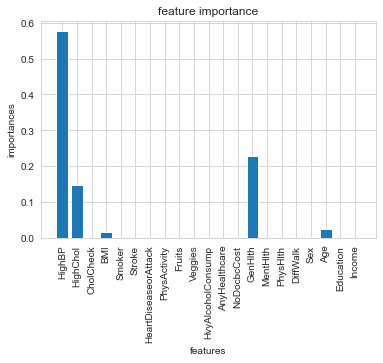

In [54]:
feature_names=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income',
                            ]
plt.bar(feature_names,model_best.feature_importances_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('importances')
plt.title('feature importance')
plt.show()

# 2: SVM Algorithm 

In [55]:
classifierSvm = LinearSVC(C=100,loss='hinge')

In [56]:
classifierSvm.fit(x,y)

LinearSVC(C=100, loss='hinge')

model test before sampling

In [57]:
y_pred_test= classifierSvm.predict(x_test)
acc_test= accuracy_score(y_test,y_pred_test)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y_test, y_pred_test))
print('accuracy of training: ',acc_test)

Confusion Matrix is : 
 [[42896   706]
 [ 6544   590]]
accuracy of training:  0.8571034374014507


In [58]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43602
         1.0       0.46      0.08      0.14      7134

    accuracy                           0.86     50736
   macro avg       0.66      0.53      0.53     50736
weighted avg       0.81      0.86      0.81     50736



model train before sampling

In [59]:
#train
y_pred_svm= classifierSvm.predict(x)
acc_test= accuracy_score(y,y_pred_svm)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y,y_pred_svm))
print('accuracy of training: ',acc_test)

Confusion Matrix is : 
 [[171886   2846]
 [ 25890   2322]]
accuracy of training:  0.858404288867865


In [60]:
classifierSvm.fit(x_train_s,y_train_s)
y_pred_test11= classifierSvm.predict(x_test_s)
y_pred11= classifierSvm.predict(x_train_s)

model train after sampling 

In [61]:
acc_test= accuracy_score(y_train_s,y_pred11)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y_train_s,y_pred11))
print('accuracy of training: ',acc_test)

Confusion Matrix is : 
 [[121902  30826]
 [ 51912 101027]]
accuracy of training:  0.729319815354618


model test after sampling 

In [62]:
acc_test= accuracy_score(y_test_s,y_pred_test11)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y_test_s, y_pred_test11))
print('accuracy of training: ',acc_test)
print(classification_report(y_test_s,y_pred_test11))

Confusion Matrix is : 
 [[52657 12949]
 [22349 43046]]
accuracy of training:  0.7305516751780521
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75     65606
         1.0       0.77      0.66      0.71     65395

    accuracy                           0.73    131001
   macro avg       0.74      0.73      0.73    131001
weighted avg       0.74      0.73      0.73    131001



# 3: Logistic Regression Algorithm

model test before sampling

In [63]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

y_pred = log_reg.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[42565  1037]
 [ 6001  1133]]
-----------------------
Accuracy is : 
 86.12819299905392
-----------------------
Precsion is : 
 52.21198156682028
-----------------------
F1 score is : 
 24.35511607910576
-----------------------


model train before sampling

In [64]:
y_pred_lr = log_reg.predict(x)

print ("confussion matrix is : \n")
print (confusion_matrix(y, y_pred_lr))
print ("-----------------------")
ACC = accuracy_score(y, y_pred_lr )
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y, y_pred_lr)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y, y_pred_lr)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[170443   4289]
 [ 23680   4532]]
-----------------------
Accuracy is : 
 86.21836565752129
-----------------------
Precsion is : 
 51.37739485319125
-----------------------
F1 score is : 
 24.475467825993036
-----------------------


model test after sampling 

In [65]:
log_reg.fit(x_train_s,y_train_s)

y_pred = log_reg.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[47464 18142]
 [14367 51028]]
-----------------------
Accuracy is : 
 75.18415889955038
-----------------------
Precsion is : 
 73.77186641607634
-----------------------
F1 score is : 
 75.84141492958794
-----------------------


model train after sampling 

In [66]:
y_pred_lr = log_reg.predict(x_train_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_train_s, y_pred_lr))
print ("-----------------------")
ACC = accuracy_score(y_train_s, y_pred_lr )
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_train_s, y_pred_lr)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_train_s, y_pred_lr)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[110099  42629]
 [ 33426 119513]]
-----------------------
Accuracy is : 
 75.11834774444085
-----------------------
Precsion is : 
 73.70884780007647
-----------------------
F1 score is : 
 75.86176253090474
-----------------------


# 4: K-NN Algorithm

model test before sampling

In [67]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x, y)

y_pred= classifier.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1)
print ("-----------------------")

confussion matrix is : 

[[41644  1958]
 [ 5785  1349]]
-----------------------
Accuracy is : 
 0.8473864711447493
-----------------------
Precsion is : 
 0.40792258844874507
-----------------------
F1 score is : 
 0.25840436739775885
-----------------------


model test before sampling

In [68]:
classifier.fit(x_train_s, y_train_s)

y_pred= classifier.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1)
print ("-----------------------")

confussion matrix is : 

[[44429 21177]
 [ 1460 63935]]
-----------------------
Accuracy is : 
 0.8271997923679972
-----------------------
Precsion is : 
 0.7511866716796691
-----------------------
F1 score is : 
 0.8495950354468562
-----------------------


# 5: Voting Algorithm

In [69]:
estimators = [
    ('tree', model_best),
    ('logistic', log_reg),
    ('svm', classifierSvm)
]
voting_clf = VotingClassifier(estimators)
all_estimators = estimators + [('voting clf', voting_clf)]
all_estimators

[('tree', DecisionTreeClassifier(max_depth=6, random_state=2)),
 ('logistic', LogisticRegression()),
 ('svm', LinearSVC(C=100, loss='hinge')),
 ('voting clf',
  VotingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       random_state=2)),
                               ('logistic', LogisticRegression()),
                               ('svm', LinearSVC(C=100, loss='hinge'))]))]

model test before sampling

In [70]:
voting_clf.fit(x, y)

y_pred = voting_clf.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[43103   499]
 [ 6462   672]]
-----------------------
Accuracy is : 
 86.27995900346895
-----------------------
Precsion is : 
 57.38684884713919
-----------------------
F1 score is : 
 16.183022275737507
-----------------------


model test after sampling

In [71]:
voting_clf.fit(x_train_s, y_train_s)

y_pred = voting_clf.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[46113 19493]
 [ 7992 57403]]
-----------------------
Accuracy is : 
 79.01924412790741
-----------------------
Precsion is : 
 74.6501768622555
-----------------------
F1 score is : 
 80.68395049581493
-----------------------


# feature selection

In [72]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [73]:
new_data=bestfeatures.fit_transform(data_input,data_output)

In [74]:
new_data.shape

(253680, 10)

In [75]:
bestfeatures.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False,  True])

splitting after feature selection

In [76]:
x,x_test,y,y_test=train_test_split(new_data,data_output,test_size=0.2,random_state=2)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.33,random_state=2)

In [77]:
print(x_val.shape)
print(y_val.shape)

(66972, 10)
(66972,)


DecisionTree

In [78]:
model = DecisionTreeClassifier(max_depth=50)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [79]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.9650369193657518
0.8180134981783432


In [80]:
max_depth_values=[1,2,3,4,5,6,7,8,9,10,11]
train_accuracy_values=[]
val_accuracy_values=[]

for max_depth_val in max_depth_values:
    model=DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val=model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

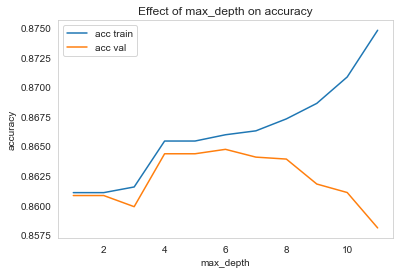

In [81]:
plt.plot(max_depth_values,train_accuracy_values,label='acc train')
plt.plot(max_depth_values,val_accuracy_values,label='acc val')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()

In [82]:
model_best = DecisionTreeClassifier(max_depth=6,random_state=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=2)

In [83]:
y_pred_test_dt = model_best.predict(x_test)
print(accuracy_score(y_test,y_pred_test_dt))

0.8632923368022706


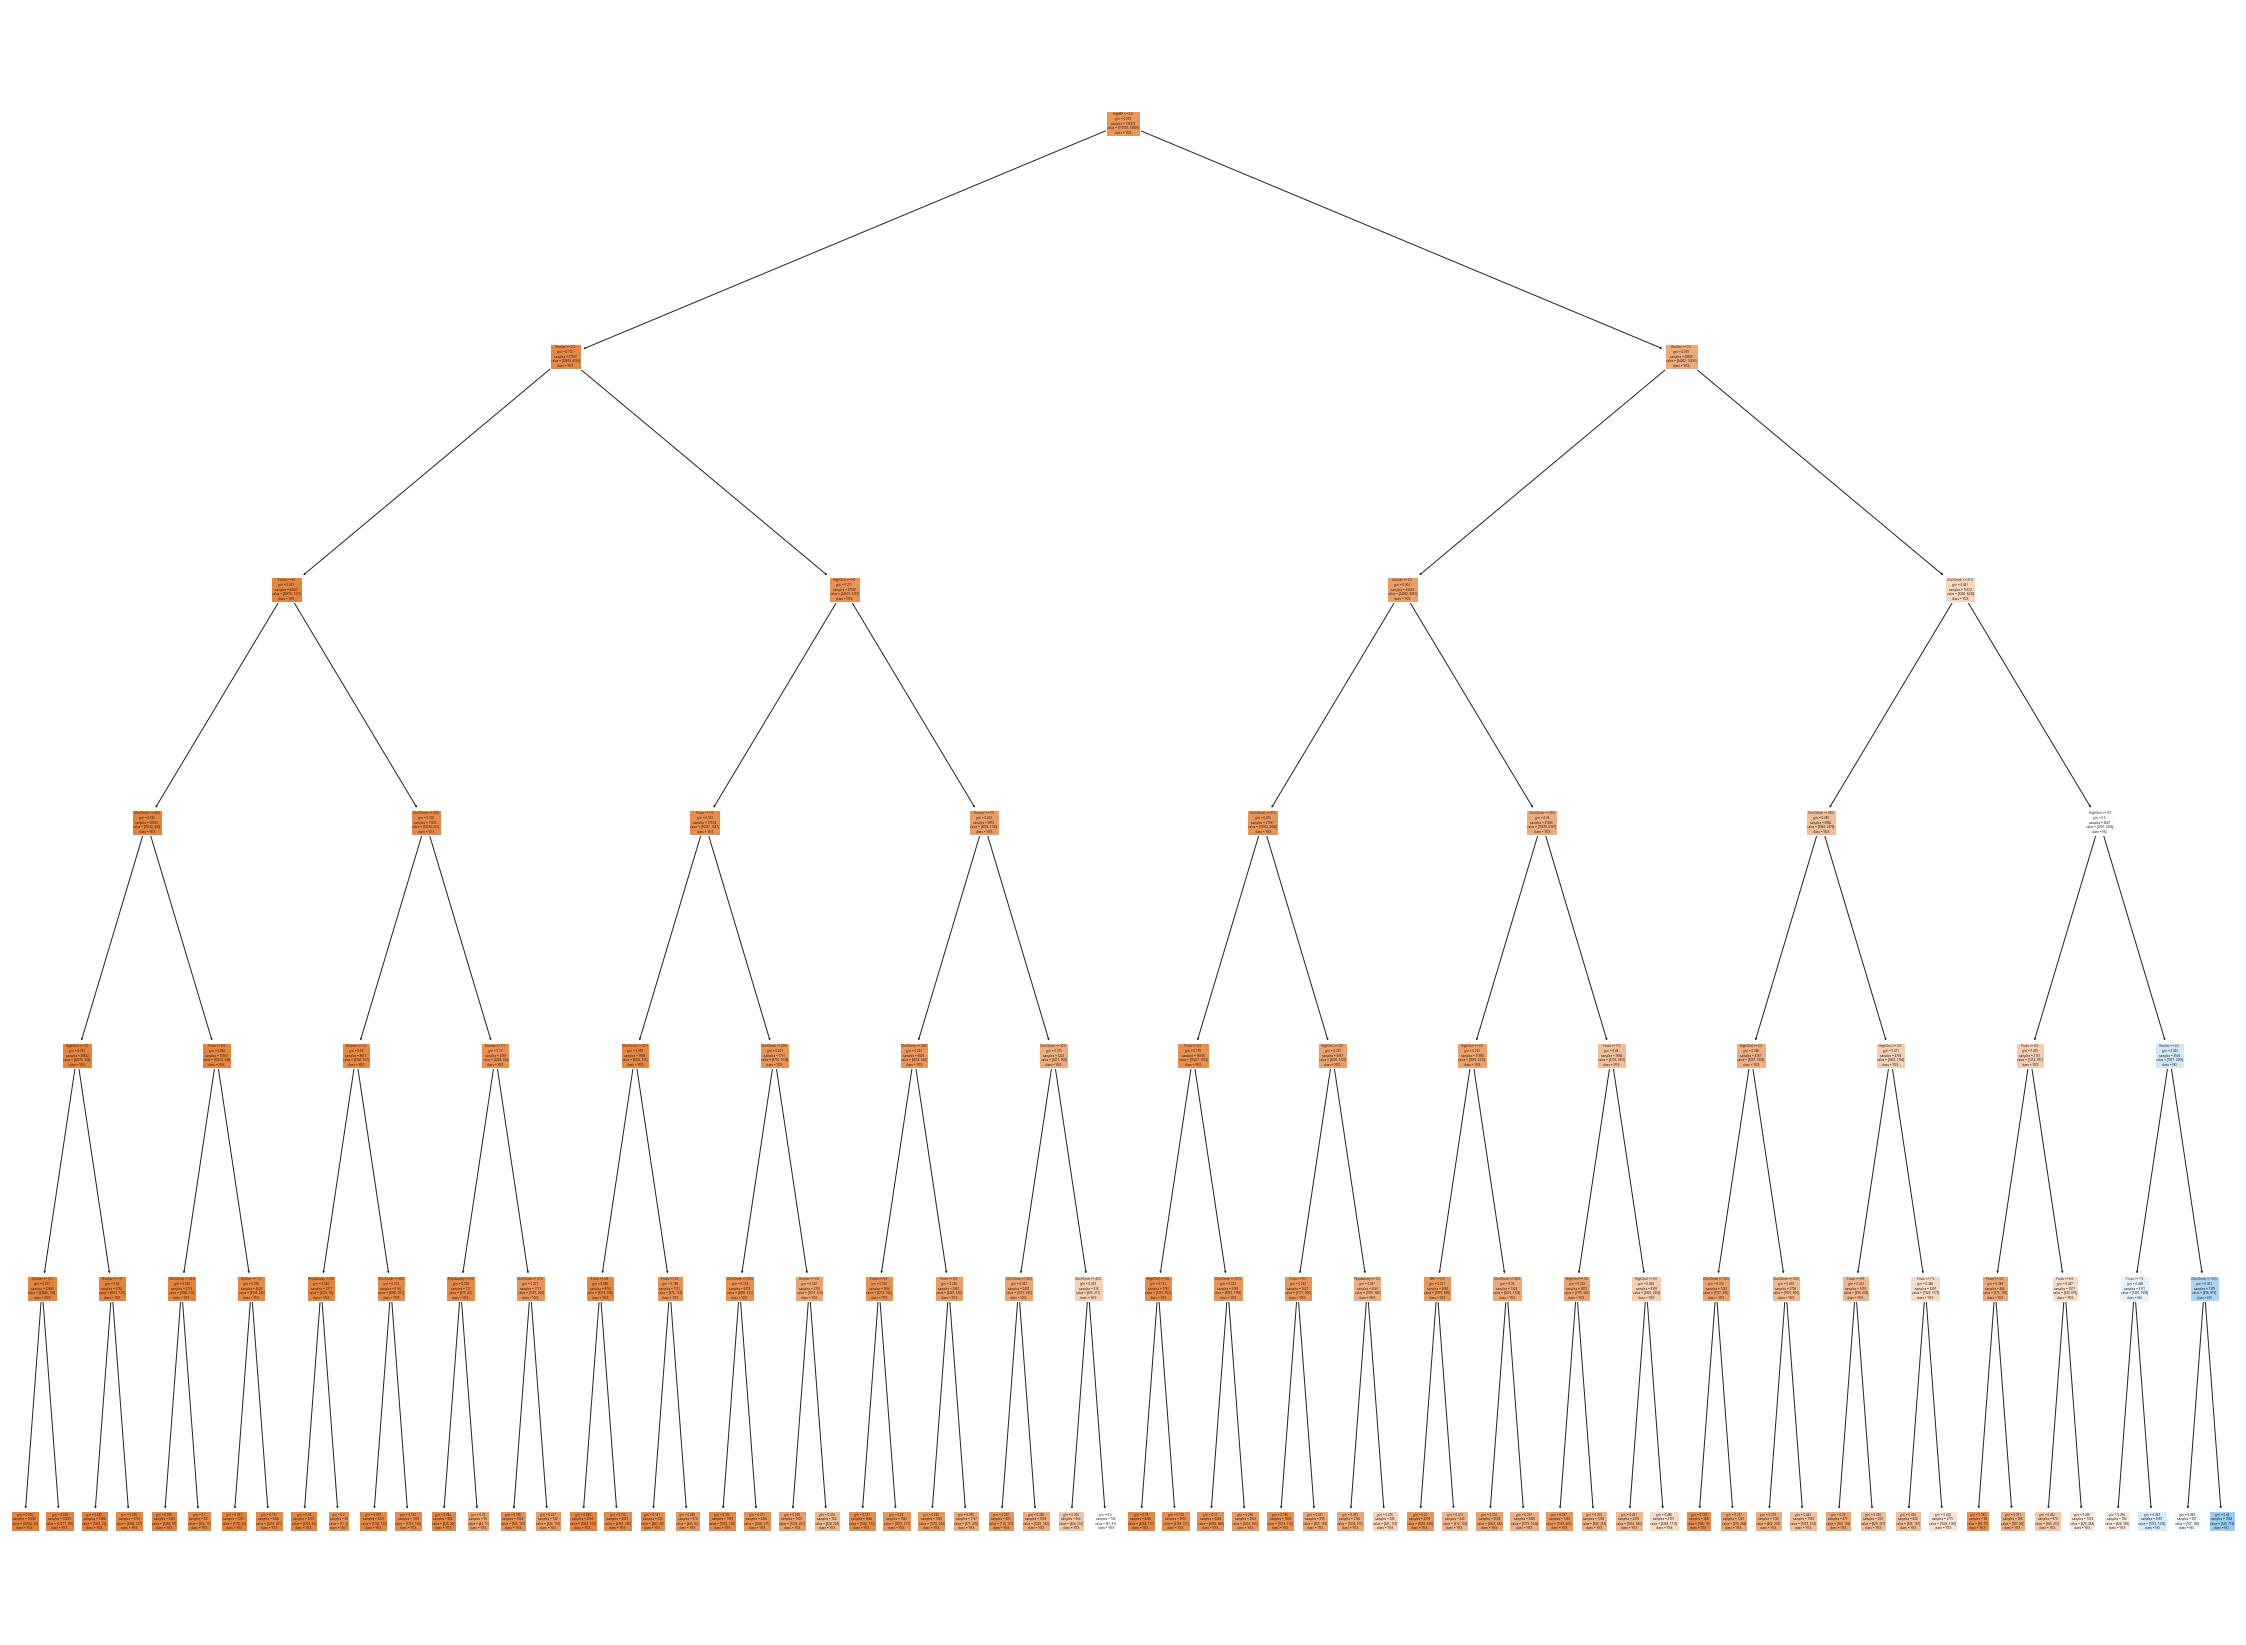

In [84]:
plt.figure(figsize=(40, 30))

tree.plot_tree(model_best,
               feature_names=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                              'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                              'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
                              ],
               class_names=['YES', 'NO'],
               filled=True
               )
plt.show()

report after feature selection

In [85]:
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43602
         1.0       0.57      0.11      0.19      7134

    accuracy                           0.86     50736
   macro avg       0.72      0.55      0.56     50736
weighted avg       0.83      0.86      0.82     50736



model test after feature selection without sampling

In [86]:
print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred_test_dt))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred_test_dt)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred_test_dt)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred_test_dt)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[43007   595]
 [ 6341   793]]
-----------------------
Accuracy is : 
 86.32923368022706
-----------------------
Precsion is : 
 57.13256484149856
-----------------------
F1 score is : 
 18.610654775874206
-----------------------


model train after feature selection without sampling

In [87]:
y_pred_dt = model_best.predict(x)
print ("confussion matrix is : \n")
print (confusion_matrix(y, y_pred_dt))
print ("-----------------------")
ACC = accuracy_score(y, y_pred_dt)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y, y_pred_dt)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y, y_pred_dt)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[172407   2325]
 [ 24962   3250]]
-----------------------
Accuracy is : 
 86.55441895301166
-----------------------
Precsion is : 
 58.29596412556054
-----------------------
F1 score is : 
 19.23816852635629
-----------------------


In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(data_output == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(data_output == 0)))

Before OverSampling, counts of label '1': 35346
Before OverSampling, counts of label '0': 218334 



sampling data after feature selection

In [89]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(new_data, data_output)

In [90]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_res,y_res,test_size=0.2,random_state=2)

In [91]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, counts of label '1': 218334
After OverSampling, counts of label '0': 218334


In [92]:
scaler = StandardScaler()
scaler.fit(x_train_s)
x_train_scaled = scaler.fit_transform(x_train_s)
x_test_scaled = scaler.fit_transform(x_test_s)

In [93]:
model_best.fit(x_train_s, y_train_s)
y_pred_test = model_best.predict(x_test_s)
print(classification_report(y_test_s, y_pred_test))
print(accuracy_score(y_test_s, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     43738
         1.0       0.79      0.80      0.80     43596

    accuracy                           0.80     87334
   macro avg       0.80      0.80      0.80     87334
weighted avg       0.80      0.80      0.80     87334

0.7954061419378478


In [94]:
with open('saved.model.pickle','wb')as f:
    pickle.dump(model_best,f)

with open('saved.model.pickle','rb')as f:
    loaded_model = pickle.load(f)

model test after sampling & feature selection

In [95]:
print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred_test))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred_test)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred_test)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred_test)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[34591  9147]
 [ 8721 34875]]
-----------------------
Accuracy is : 
 79.54061419378478
-----------------------
Precsion is : 
 79.22175275998364
-----------------------
F1 score is : 
 79.60693008285969
-----------------------


model train after sampling & feature selection

In [96]:
y_train_res_pred=model_best.predict(x_train_s)
print ("confussion matrix is : \n")
print (confusion_matrix(y_train_s,y_train_res_pred))
print ("-----------------------")
ACC = accuracy_score(y_train_s,y_train_res_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_train_s,y_train_res_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_train_s,y_train_res_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[137656  36940]
 [ 33777 140961]]
-----------------------
Accuracy is : 
 79.75662260186527
-----------------------
Precsion is : 
 79.23564229543398
-----------------------
F1 score is : 
 79.94634739776373
-----------------------


SVM

In [97]:
classifierSvm = LinearSVC(C=100,loss='hinge')

In [98]:
classifierSvm.fit(x,y)

LinearSVC(C=100, loss='hinge')

In [99]:
with open('saved.SVM.pickle','wb')as f:
    pickle.dump(classifierSvm,f)

with open('saved.SVM.pickle','rb')as f:
    loaded_model_SVM = pickle.load(f)

model test after feature selection without sampling

In [100]:
y_pred_test= classifierSvm.predict(x_test)
acc_test= accuracy_score(y_test,y_pred_test)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y_test, y_pred_test))
print('accuracy of training: ',acc_test)
print(classification_report(y_test,y_pred_test))

Confusion Matrix is : 
 [[39417  4185]
 [ 4693  2441]]
accuracy of training:  0.8250157678965626
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     43602
         1.0       0.37      0.34      0.35      7134

    accuracy                           0.83     50736
   macro avg       0.63      0.62      0.63     50736
weighted avg       0.82      0.83      0.82     50736



model train after feature selection without sampling

In [101]:
# train
y_pred_svm= classifierSvm.predict(x)
acc_test= accuracy_score(y,y_pred_svm)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y,y_pred_svm))
print('accuracy of training: ',acc_test)

Confusion Matrix is : 
 [[157889  16843]
 [ 18466   9746]]
accuracy of training:  0.8260160438347525


model train after sampling & feature selection 

In [102]:
classifierSvm.fit(x_train_scaled, y_train_s)
y_pred_test11 = classifierSvm.predict(x_test_scaled)
y_pred11 = classifierSvm.predict(x_train_scaled)

acc_test = accuracy_score(y_train_s, y_pred11)
print('Confusion Matrix is : \n', confusion_matrix(y_train_s, y_pred11))
print('accuracy of training: ', acc_test)

Confusion Matrix is : 
 [[134870  39726]
 [ 53774 120964]]
accuracy of training:  0.7323478390308416


model test after sampling & feature selection

In [103]:
acc_test= accuracy_score(y_test_s,y_pred_test11)
#print(classifier._class.name_)
print('Confusion Matrix is : \n', confusion_matrix(y_test_s, y_pred_test11))
print('accuracy of training: ',acc_test)
print(classification_report(y_test_s,y_pred_test11))

Confusion Matrix is : 
 [[33848  9890]
 [13354 30242]]
accuracy of training:  0.7338493599285502
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     43738
         1.0       0.75      0.69      0.72     43596

    accuracy                           0.73     87334
   macro avg       0.74      0.73      0.73     87334
weighted avg       0.74      0.73      0.73     87334



Logistic Regression

In [104]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

In [105]:
with open('saved.Logistic.pickle','wb')as f:
    pickle.dump(log_reg,f)

#with open('saved.Logistic.pickle','rb')as f:
#loaded_model_Logistic = pickle.load(f)

model test after feature selection without sampling

In [106]:
y_pred = log_reg.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[42751   851]
 [ 6134  1000]]
-----------------------
Accuracy is : 
 86.23265531378114
-----------------------
Precsion is : 
 54.02485143165856
-----------------------
F1 score is : 
 22.259321090706734
-----------------------


model train after feature selection without sampling

In [107]:
y_pred_lr = log_reg.predict(x)

print ("confussion matrix is : \n")
print (confusion_matrix(y, y_pred_lr))
print ("-----------------------")
ACC = accuracy_score(y, y_pred_lr )
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y, y_pred_lr)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y, y_pred_lr)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[171038   3694]
 [ 24095   4117]]
-----------------------
Accuracy is : 
 86.30706007568591
-----------------------
Precsion is : 
 52.70771988221738
-----------------------
F1 score is : 
 22.857618743580492
-----------------------


model test after sampling & feature selection

In [108]:
log_reg.fit(x_train_s,y_train_s)

y_pred = log_reg.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[31783 11955]
 [ 9849 33747]]
-----------------------
Accuracy is : 
 75.03377836810407
-----------------------
Precsion is : 
 73.8414073782329
-----------------------
F1 score is : 
 75.58287979574011
-----------------------


model train after sampling & feature selection

In [109]:
y_pred_lr = log_reg.predict(x_train_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_train_s, y_pred_lr))
print ("-----------------------")
ACC = accuracy_score(y_train_s, y_pred_lr )
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_train_s, y_pred_lr)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_train_s, y_pred_lr)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[126485  48111]
 [ 39218 135520]]
-----------------------
Accuracy is : 
 75.00128816548059
-----------------------
Precsion is : 
 73.8001753516563
-----------------------
F1 score is : 
 75.63154179072407
-----------------------


K-NN

In [110]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x, y)

KNeighborsClassifier()

In [111]:
with open('saved.KNN.pickle','wb')as f:
    pickle.dump(classifier,f)


with open('saved.KNN.pickle','rb')as f:
    loaded_model_KNN = pickle.load(f)

model test after feature selection without sampling

In [112]:
y_pred= classifier.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1)
print ("-----------------------")

confussion matrix is : 

[[41529  2073]
 [ 5722  1412]]
-----------------------
Accuracy is : 
 0.8463615578681803
-----------------------
Precsion is : 
 0.40516499282639884
-----------------------
F1 score is : 
 0.2659384122798757
-----------------------


model test after sampling & feature selection

In [113]:
classifier.fit(x_train_s, y_train_s)

y_pred= classifier.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1)
print ("-----------------------")

confussion matrix is : 

[[33103 10635]
 [ 4475 39121]]
-----------------------
Accuracy is : 
 0.8269860535415761
-----------------------
Precsion is : 
 0.7862569338371251
-----------------------
F1 score is : 
 0.8381395149541521
-----------------------


Voting

In [114]:
estimators = [
    ('tree', model_best),
    ('logistic', log_reg),
    ('svm', classifierSvm)
]
voting_clf = VotingClassifier(estimators)
all_estimators = estimators + [('voting clf', voting_clf)]
all_estimators

[('tree', DecisionTreeClassifier(max_depth=6, random_state=2)),
 ('logistic', LogisticRegression()),
 ('svm', LinearSVC(C=100, loss='hinge')),
 ('voting clf',
  VotingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       random_state=2)),
                               ('logistic', LogisticRegression()),
                               ('svm', LinearSVC(C=100, loss='hinge'))]))]

In [115]:
voting_clf.fit(x, y)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=2)),
                             ('logistic', LogisticRegression()),
                             ('svm', LinearSVC(C=100, loss='hinge'))])

In [116]:
with open('saved.Voting.pickle','wb')as f:
    pickle.dump(voting_clf,f)

with open('saved.Voting.pickle','rb')as f:
    loaded_model_Voting = pickle.load(f)

model test after feature selection without sampling

In [117]:
y_pred = voting_clf.predict(x_test)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[43315   287]
 [ 6655   479]]
-----------------------
Accuracy is : 
 86.31740775780511
-----------------------
Precsion is : 
 62.532637075718014
-----------------------
F1 score is : 
 12.126582278481013
-----------------------


model test after sampling & feature selection

In [118]:
voting_clf.fit(x_train_s, y_train_s)

y_pred = voting_clf.predict(x_test_s)

print ("confussion matrix is : \n")
print (confusion_matrix(y_test_s, y_pred))
print ("-----------------------")
ACC = accuracy_score(y_test_s, y_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(y_test_s, y_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(y_test_s, y_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

confussion matrix is : 

[[31328 12410]
 [ 7982 35614]]
-----------------------
Accuracy is : 
 76.65055991938992
-----------------------
Precsion is : 
 74.15875395635516
-----------------------
F1 score is : 
 77.74285090591574
-----------------------


saved modules

In [119]:
import pickle

with open('saved.decisionTree.pickle', 'wb') as f:
    pickle.dump(model_best, f)

In [120]:
with open('saved.SVM.pickle', 'wb') as f:
    pickle.dump(classifierSvm, f)

In [121]:
with open('saved.Logistic.pickle', 'wb') as f:
    pickle.dump(log_reg, f)

In [122]:
with open('saved.KNN.pickle', 'wb') as f:
    pickle.dump(classifier, f)

In [123]:
with open('saved.Voting.pickle', 'wb') as f:
    pickle.dump(voting_clf, f)

read new data


In [124]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [125]:
data_input = df.drop(columns=['Diabetes_binary'])
data_output =  df['Diabetes_binary']

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
data_input = bestfeatures.fit_transform(data_input, data_output)

In [ ]:
new_data.shape
bestfeatures.get_support()

load modules

In [126]:
with open('saved.decisionTree.pickle', 'rb') as f:
    loaded_model_ds = pickle.load(f)


In [127]:
with open('saved.SVM.pickle','rb')as f:
    loaded_model_SVM = pickle.load(f)

In [128]:
with open('saved.Logistic.pickle','rb')as f:
    loaded_model_Logistic = pickle.load(f)

In [129]:
with open('saved.KNN.pickle','rb')as f:
    loaded_model_KNN = pickle.load(f)

In [130]:
with open('saved.Voting.pickle','rb')as f:
    loaded_model_Voting = pickle.load(f)

test evaluation

In [131]:
ds_pred = loaded_model_ds.predict(data_input)

ValueError: X has 21 features, but DecisionTreeClassifier is expecting 10 features as input.

In [ ]:
print ("confussion matrix is : \n")
print (confusion_matrix(data_output,ds_pred))
print ("-----------------------")
ACC = accuracy_score(data_output,ds_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(data_output,ds_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(data_output,ds_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

In [ ]:
svm_pred = loaded_model_SVM.predict(data_input)


In [ ]:
print ("confussion matrix is : \n")
print (confusion_matrix(data_output,svm_pred))
print ("-----------------------")
ACC = accuracy_score(data_output,svm_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(data_output,svm_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(data_output,svm_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

In [ ]:
lg_pred = loaded_model_Logistic.predict(data_input)


In [ ]:
print ("confussion matrix is : \n")
print (confusion_matrix(data_output,lg_pred))
print ("-----------------------")
ACC = accuracy_score(data_output,lg_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(data_output,lg_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(data_output,lg_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

In [ ]:
knn_pred = loaded_model_KNN.predict(data_input)


In [ ]:
print ("confussion matrix is : \n")
print (confusion_matrix(data_output,knn_pred))
print ("-----------------------")
ACC = accuracy_score(data_output,knn_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(data_output,knn_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(data_output,knn_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")

In [ ]:
voting_pred = loaded_model_Voting.predict(data_input)


In [ ]:
print ("confussion matrix is : \n")
print (confusion_matrix(data_output,voting_pred))
print ("-----------------------")
ACC = accuracy_score(data_output,voting_pred)
print ("Accuracy is : \n", ACC * 100)
print ("-----------------------")
Prec = precision_score(data_output,voting_pred)
print ("Precsion is : \n", Prec * 100)
print ("-----------------------")
F1 = f1_score(data_output,voting_pred)
print ("F1 score is : \n", F1 * 100)
print ("-----------------------")